In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('../numpy_images/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

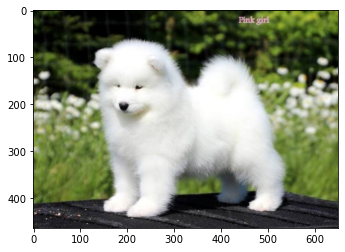

In [3]:
plt.imshow(full)

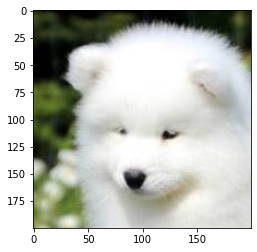

In [4]:
face = full[50:250,100:300]
plt.imshow(face)

In [5]:
face.shape

(200, 200, 3)

In [6]:
sum([1,2,3])

6

In [7]:
mystring = 'sum'

In [8]:
mystring([1,2,3])

TypeError: 'str' object is not callable

In [9]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [10]:
myfunc = eval(mystring)

In [11]:
myfunc([1,2,3])

6

In [12]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [13]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face,my_method)

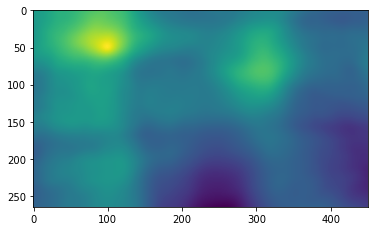

In [15]:
# shows brighter color where it thinks it found a match
plt.imshow(res)

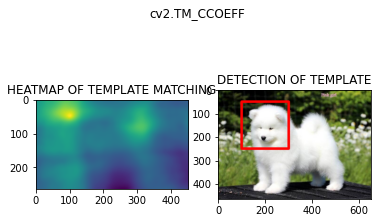

/n
/n


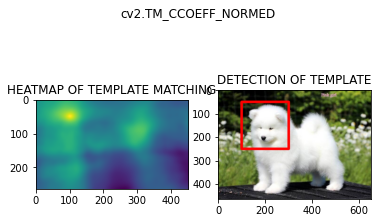

/n
/n


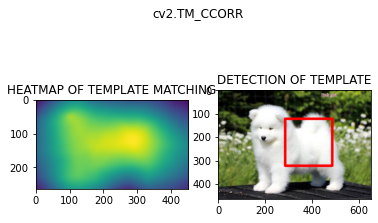

/n
/n


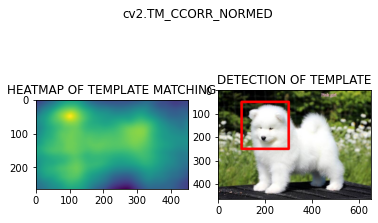

/n
/n


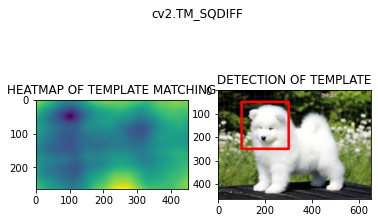

/n
/n


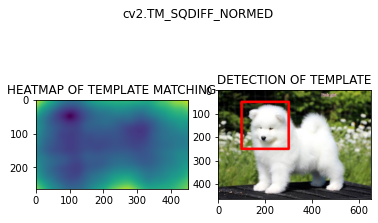

/n
/n


In [16]:
for m in methods:
    
    # CREATE A COPY
    full_copy = full.copy()
    
    method = eval(m)
    
    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc
    
    height,width,channels = face.shape
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # Plot and show the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    # TITLE WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    
    print('/n')
    print('/n')